In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

# ensure project root (one level up) is on PATH
ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)

In [3]:
from trackers.player_detector import PlayerDetector
from utils.video_utils import read_video, save_video
from utils.import_models import ModelImporter

players_model = ModelImporter().download_player_model()
video_path = "../sample_data/B1606b0e6_1 (91).mp4"
output_path = "../output_videos/output_video.avi"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

Model downloaded to /home/bbrzyski/.cache/kagglehub/models/blaku03/player-detection/pyTorch/player_detectionv1_1/1



0: 544x960 1 ball, 21 players, 1 referee, 33.2ms
1: 544x960 1 ball, 21 players, 1 referee, 33.2ms
2: 544x960 1 ball, 1 goalkeeper, 23 players, 33.2ms
3: 544x960 1 goalkeeper, 22 players, 2 referees, 33.2ms
4: 544x960 1 ball, 1 goalkeeper, 21 players, 1 referee, 33.2ms
5: 544x960 1 ball, 2 goalkeepers, 24 players, 1 referee, 33.2ms
6: 544x960 1 ball, 20 players, 2 referees, 33.2ms
7: 544x960 22 players, 1 referee, 33.2ms
8: 544x960 1 ball, 1 goalkeeper, 23 players, 1 referee, 33.2ms
9: 544x960 1 goalkeeper, 22 players, 33.2ms

0: 544x960 21 players, 2 referees, 34.3ms
1: 544x960 22 players, 2 referees, 34.3ms
2: 544x960 20 players, 2 referees, 34.3ms
3: 544x960 1 ball, 20 players, 2 referees, 34.3ms
4: 544x960 1 ball, 20 players, 2 referees, 34.3ms
5: 544x960 20 players, 2 referees, 34.3ms
6: 544x960 1 ball, 20 players, 2 referees, 34.3ms
7: 544x960 1 ball, 20 players, 2 referees, 34.3ms
8: 544x960 1 ball, 20 players, 2 referees, 34.3ms
9: 544x960 1 ball, 22 players, 2 referees, 34.3ms

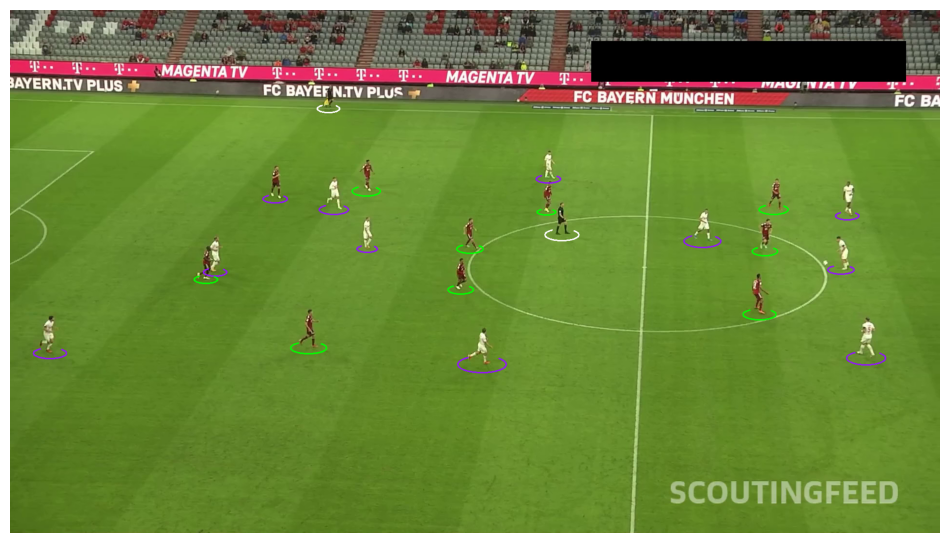

In [4]:
from annotators.player_annotator import PlayersAnnotator
from utils.notebook_utils import show_image
import itertools

frame_generator = read_video(video_path)
first_frame = next(frame_generator)

tracks_generator =  PlayerDetector(players_model).get_detections_from_frames(frame_generator)
first_track = next(tracks_generator)

annotated_sample_image = PlayersAnnotator.annotate_frame(first_frame.copy(), first_track)
show_image(annotated_sample_image)

In [21]:
from assigners.ball_statistics import BallStatictis

frame_generator = read_video(video_path)
tracks_generator =  PlayerDetector(players_model).get_detections_from_frames(frame_generator)

itr = 0
ball_stats = BallStatictis()
for track in tracks_generator:
    ball_stats.stats(track)
    itr += 1
    if itr == 10:
        break

TypeError: ByteTrack.__init__() got an unexpected keyword argument 'track_thresh'